In [1]:
import sys
sys.path.append('..')

In [11]:
import re
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from sentiment import SentimentAnalysis

In [4]:
conn = sqlite3.connect('../letters.db')

data = pd.read_sql(con=conn, sql='select * from letters where sentiment is not null')

data

,id,gestora,title,date,url,content,sentiment
0,1,Guepardo,Relatório de Gestão 3º Trimestre - 2024,2024-07-01,https://www.guepardoinvest.com.br/Carta-111-Ca...,Carta aos Investidores 3º Tr...,76
1,2,Guepardo,Relatório de Gestão 2º Trimestre - 2024,2024-04-01,https://www.guepardoinvest.com.br/Carta-110-Ca...,\n 1 \nCarta aos Investidores ...,74
2,3,Guepardo,Relatório de Gestão 1º Trimestre - 2024,2024-01-01,https://www.guepardoinvest.com.br/Carta-109-Ca...,\n \n 1 \nCarta aos Investidore...,73
3,4,Guepardo,Relatório de Gestão 4º Trimestre - 2023,2023-10-01,https://www.guepardoinvest.com.br/Carta-108-Ca...,\n 1 \nCarta aos Investidores –...,74
4,5,Guepardo,Relatório de Gestão 3º Trimestre - 2023,2023-07-01,https://www.guepardoinvest.com.br/Carta-107-Ca...,\n \n 1 \nCarta aos Investidore...,73
...,...,...,...,...,...,...,...
199,278,IP Capital,Relatório de Gestão 1º Trimestre 2000 (JANEIRO...,2000-03-01,https://ip-capitalpartners.com/wp-content/uplo...,Relatório de Gestão\n(*) Início da gestão Inve...,56
200,279,IP Capital,Relatório de Gestão 4º Trimestre 1999 (OUTUBRO...,1999-12-01,https://ip-capitalpartners.com/wp-content/uplo...,Relatório de Gestão\n(*) Início da gestão Inve...,56
201,280,IP Capital,Relatório de Gestão 3º Trimestre 1999 (JULHO -...,1999-09-01,https://ip-capitalpartners.com/wp-content/uplo...,Relatório de Gestão\n(*) Início da gestão Inve...,56
202,281,IP Capital,Relatório de Gestão 2º Trimestre 1999 (ABRIL -...,1999-06-01,https://ip-capitalpartners.com/wp-content/uplo...,Relatório de Gestão\n(*) Início da gestão Inve...,56


In [5]:
grouped_data = data.groupby('date')['sentiment'].mean()
grouped_data.index = pd.to_datetime(grouped_data.index)
grouped_data = grouped_data.sort_index()


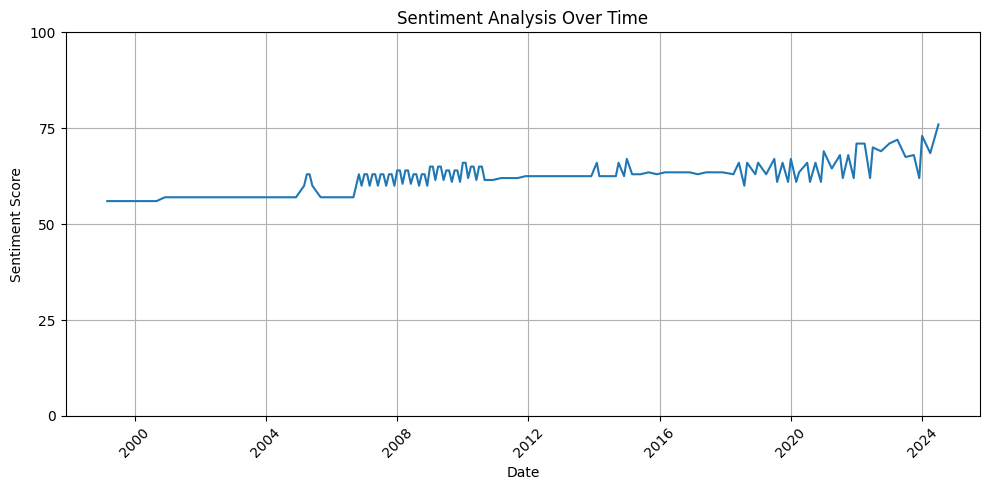

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(grouped_data.index, grouped_data)
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Analysis Over Time")
plt.xticks(rotation=45)
plt.yticks(range(0, 101, 25))
plt.ylim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()

## Evaluate Metrics

In [13]:
cursor = conn.cursor()

res = cursor.execute("""
    select * from letters 
    where content is not null and gestora = 'IP Capital'
""")

res.fetchone()

(189,
 'IP Capital',
 'Netflix: o terceiro ato da indústria de streaming (RELATÓRIO DE GESTÃO ABRIL 2024)',
 '2024-04-01',
 'https://ip-capitalpartners.com/wp-content/uploads/2024/04/IP_RG_202404_Netflix-1.pdf',
 'Relatório de Gestão | Abril 2024\n1\nRelatório de Gestão\nABRIL 2024\nNetflix: o terceiro ato  \nda indústria de streaming\nRelatório de Gestão | Abril 2024\n2\nNetflix: o terceiro ato da indústria de streaming.\nEm 2024, completaremos 5 anos como acionistas de Netflix. Nossa tese de \ninvestimento foi apresentada pela primeira vez em abril de 2020. De forma resumida, \nacreditávamos que:\n (i) a migração de usuários de TV a cabo para streaming era uma tendência \nsecular inevitável;\n (ii) que a Netflix havia construído uma série de vantagens competitivas que \ngarantiriam a dominância da empresa como o serviço âncora de streaming no \nmundo;\n (iii) isso permitiria que a companhia capturasse uma fatia desproporcional dos \nlucros do setor.\nMontamos a posição a um preço méd

In [14]:
letters = []
cols = [col[0] for col in res.description]

for row in res.fetchall():
    letters.append(dict(zip(cols, row))) 

print(cols)
print(letters[0])

['id', 'gestora', 'title', 'date', 'url', 'content', 'sentiment']
{'id': 190, 'gestora': 'IP Capital', 'title': 'Obrigado, Charlie (RELATÓRIO DE GESTÃO DEZEMBRO 2023)', 'date': '2023-12-01', 'url': 'https://ip-capitalpartners.com/wp-content/uploads/2024/01/IP_RG_obrigadocharlie.pdf', 'content': 'Relatório de Gestão | Dezembro 2023\n1\nRelatório de Gestão\nDEZEMBRO 2023\nObrigado, Charlie\nRelatório de Gestão | Dezembro 2023\n2\nRelatório de Gestão\nDEZEMBRO 2023\nIntrodução\nTransDigm\nLocaliza\nAleatórias: Um Tributo a Charlie Munger\n3\n7\n12\n16\nÍndiceRelatório de Gestão | Dezembro 2023\n3\nIntrodução\nEm 2023 vivemos uma descompressão dos mercados após o grande pessimismo \nque marcou 2022. Com os preços voltando a acompanhar a realidade econômica \ne o valor das companhias, os principais índices de ações fecharam 2023 com altos \nretornos: o Ibovespa se valorizou +22%, S&P500 +26%, MSCI World +22%, enquanto \no CDI +13%.\n \n“O que eu acho mais interessante sobre investir é o quã

In [ ]:
sa = SentimentAnalysis(db_path=None)

for i, letter in enumerate(letters[1:26], 1):
    text = letter['content']
    text = text.replace('\n', ' ').replace('  ', ' ')

    chunks = []
    sentences = re.split(r'(?<=[.!?])', text)

    for text in sentences:
        tokens = sa.tokenizer(text, add_special_tokens=False)
        token_length = len(tokens["input_ids"])
    
        if 15 <= token_length <= 500:
            chunks.append(text)

    if not chunks:
        continue

    results = sa.pipeline(chunks)

    letter['sentiment'] = sa.calculate_score(results, normalized=True)

    print(f"Processed {i} out of 25 letters", end='\r')

print("Finished processing letters")

Device set to use cuda:0


Finished processing lettersers


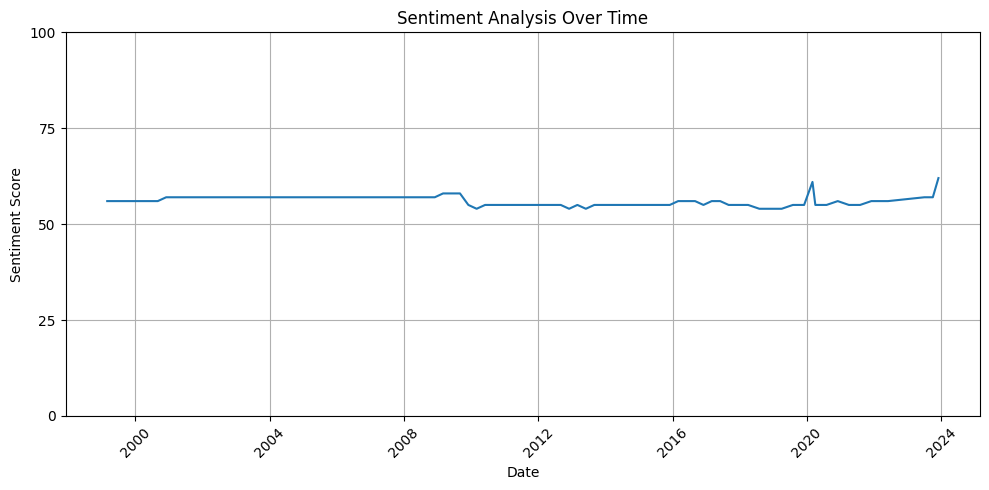

In [22]:
sentiment_by_date = {datetime.strptime(letter["date"], "%Y-%m-%d"): letter["sentiment"] for letter in letters}
sorted_sentiment = dict(sorted(sentiment_by_date.items()))

plt.figure(figsize=(10, 5))
plt.plot(sorted_sentiment.keys(), sorted_sentiment.values())
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Analysis Over Time")
plt.xticks(rotation=45)
plt.yticks(range(0, 101, 25))
plt.ylim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()